In [44]:
import requests
import pandas as pd

In [3]:
LINK = 'https://career.habr.com/api/frontend/vacancies?sort=relevance&type=all&divisions[]=backend&divisions[]=frontend&divisions[]=apps&divisions[]=software&divisions[]=testing&divisions[]=administration&divisions[]=analytics&divisions[]=security&divisions[]=support&divisions[]=other&currency=RUR&page={}'
NUM_OF_PAGES = 157

In [4]:
def get_info_from_page(url, page):
    json_response = requests.get(url.format(page)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return None
    return json_response['list']

In [5]:
def sum_info_from_all_pages(url, pages):
    sum_info = []
    for page in range(pages):
        sum_info += get_info_from_page(url, page)
    return sum_info

In [6]:
info = sum_info_from_all_pages(LINK, NUM_OF_PAGES)

In [10]:
# Сохраняем полученную информацию в файл results.json:

df = pd.DataFrame(info)
df.to_json('habr_results_20_11_2021.json')

In [45]:
# И работаем с этим файлом:

results = pd.read_json('habr_results_20_11_2021.json')

print(results)

              id  ...                                          reactions
0     1000066543  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
1     1000086667  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
2     1000090601  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
3     1000084365  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
4     1000084871  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
...          ...  ...                                                ...
3920  1000086099  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
3921  1000087987  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
3922  1000085433  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
3923  1000088653  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...
3924  1000085067  ...  {'items': [{'name': 'arrow', 'title': 'arrow',...

[3925 rows x 16 columns]


In [46]:
# Сферы деятельности:

spheres_json = results['divisions']
spheres = []
for sphere in spheres_json:
    for i in range(len(sphere)):
        spheres.append(sphere[i]['title'])
spheres = pd.Series(spheres)

print(spheres.value_counts())

Бэкенд                         1099
Разработка ПО                   748
Аналитика                       495
Фронтенд                        439
Тестирование                    414
Администрирование               278
Приложения                      209
Поддержка                        94
Другое                           90
Информационная безопасность      61
dtype: int64


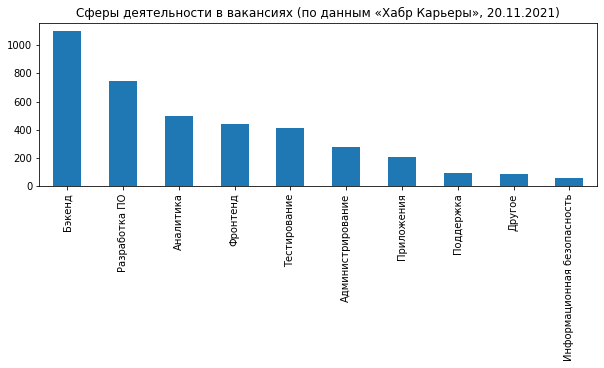

In [53]:
spheres.value_counts().plot(kind='bar',
                            figsize=(10, 3), 
                            title='Сферы деятельности в вакансиях (по данным «Хабр Карьеры», 20.11.2021)‎')

In [17]:
# Скиллы:

skills_json = results['skills']
skills = []
for skill in skills_json:
    for i in range(len(skill)):
        skills.append(skill[i]['title'])
skills = pd.Series(skills)

print(skills.value_counts())

SQL                                     821
JavaScript                              589
Git                                     565
Java                                    559
Python                                  518
                                       ... 
MySQLi                                    1
F#                                        1
Визуализация                              1
DirectX                                   1
Администрирование оборудования Cisco      1
Length: 636, dtype: int64


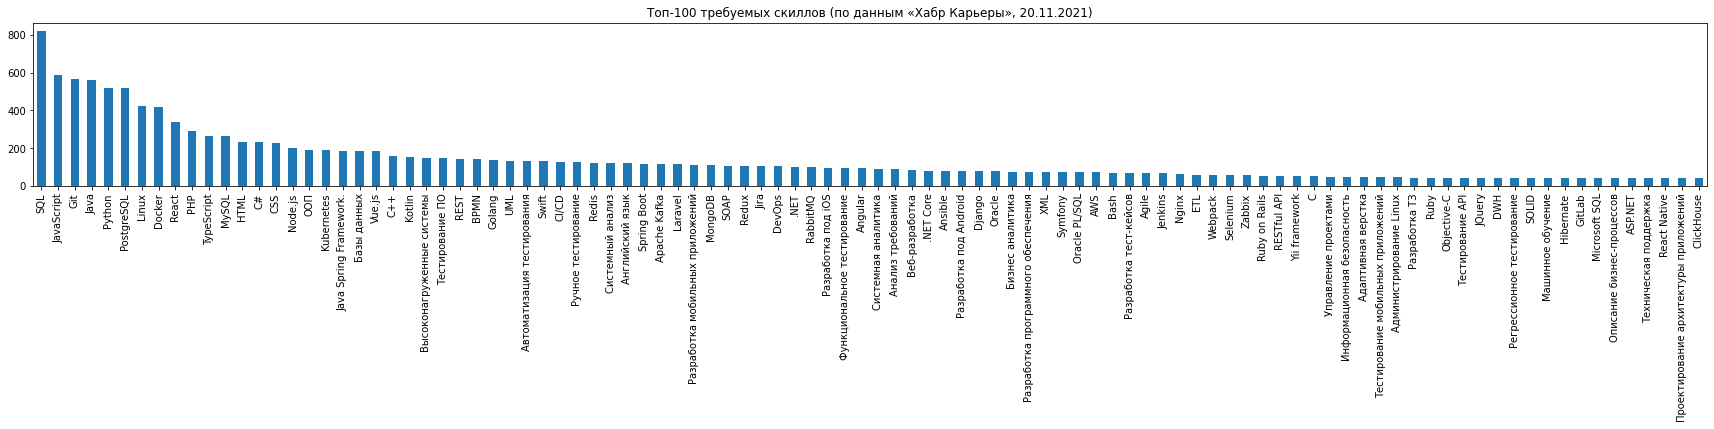

In [30]:
skills.value_counts().head(100).plot(kind='bar',
                               title='Топ-100 требуемых скиллов (по данным «Хабр Карьеры», 20.11.2021)‎',
                               figsize=(30, 3), 
                               )

In [32]:
# Специальности:

titles_json = results['title']
titles = pd.Series(titles_json)
print(titles.value_counts())

Системный аналитик                                       87
Java-разработчик                                         27
Frontend-разработчик                                     24
QA Engineer                                              24
Java разработчик                                         24
                                                         ..
Ведущий инженер END2END                                   1
Системный администратор PostgreSQL (Импортозамещение)     1
Архитектор 1С                                             1
Full Stack Web Developer                                  1
Developer C++ (KICS for Networks)                         1
Name: title, Length: 2913, dtype: int64


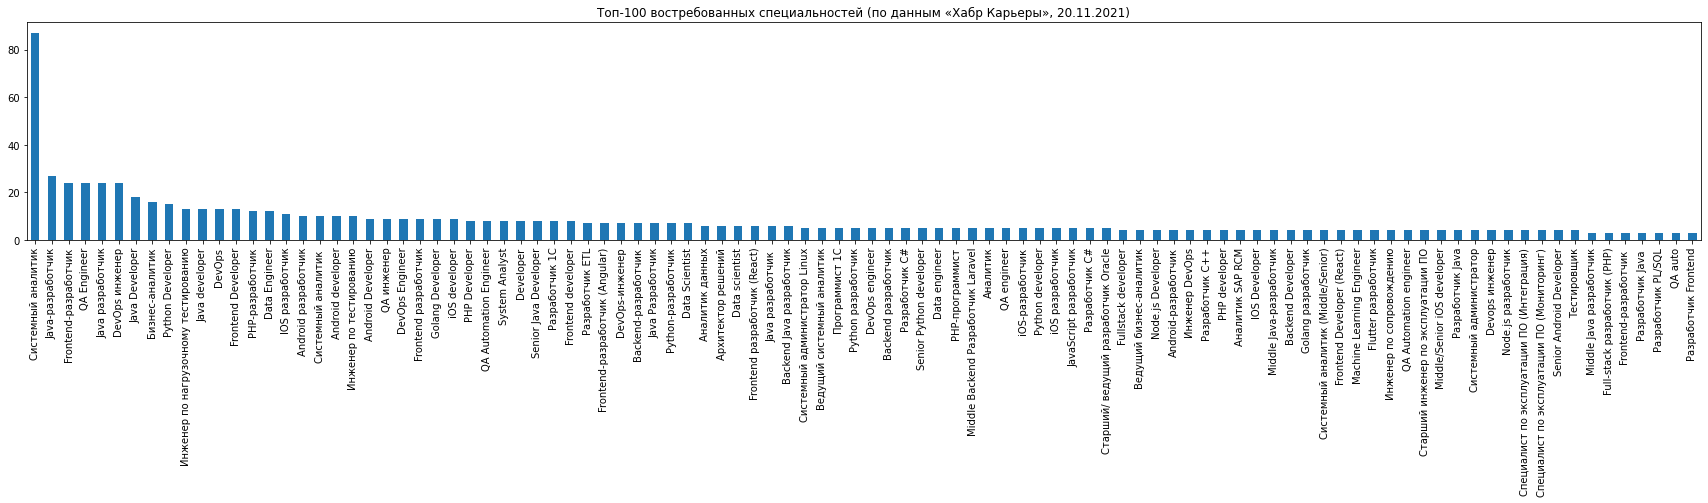

In [35]:
titles.value_counts().head(100).plot(kind='bar',
                                    figsize=(30, 4), 
                                    title='Топ-100 востребованных специальностей (по данным «Хабр Карьеры», 20.11.2021)')

In [54]:
# Удалённая работа:

remote_json = results['remoteWork']
remote = pd.Series(remote_json)
remote_rate = round(remote.sum() / remote.count() * 100)

print(f'Удалённая работа: {remote_rate} % (по данным «Хабр Карьеры», 20.11.2021. Данные на основе всех {remote.count()} IT-вакансий)')

Удалённая работа: 69 % (по данным «Хабр Карьеры», 20.11.2021. Данные на основе всех 3925 IT-вакансий)
